### Image Histogram 
Generates the image histogram of a specific frame from a dax movie.

In [56]:
import os
import numpy
import glob
import matplotlib.pyplot as plt
import tifffile
from matplotlib.offsetbox import AnchoredText
from matplotlib.ticker import PercentFormatter

import storm_analysis.sa_library.datareader as datareader

# Change directory
os.chdir("/home/gayatri/storm-data/histogram")
file_name = '1_1_5_cropped.dax'
frame_no = 10
resolution = 16

In [57]:
def showImageHist(image, imgnm) :
    # counts = 2**resolution
    # bins = numpy.arange(0, counts+1, 10)
    bins = numpy.arange(0, 4000, 5)

    fig, ax = plt.subplots(figsize = (8,8))
    wts = numpy.ones(len(image.ravel())) / len(image.ravel())
    d1 = plt.hist(image.ravel(), weights = wts, bins=bins, alpha=0.5, density= False, color='lightseagreen', edgecolor='grey', linewidth=0.8)
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.xlim([-20, 300])
    # plt.ylim([0, 0.0025])
    # plt.title('Image Histogram')
    plt.ylabel('Pixels')
    plt.xlabel('Photons per pixel')
    text = 'Median = '+ str(numpy.around(numpy.median(image), 0)) + ' photons'
    at1 = AnchoredText(text, loc='upper right', prop=dict(size=12), frameon=True)
    at1.patch.set_boxstyle("round,pad=0.2,rounding_size=0.2")
    ax.add_artist(at1)
    # plt.savefig(imgnm, bbox_inches = 'tight', pad_inches = 0)
    plt.show()

1_1_5_cropped


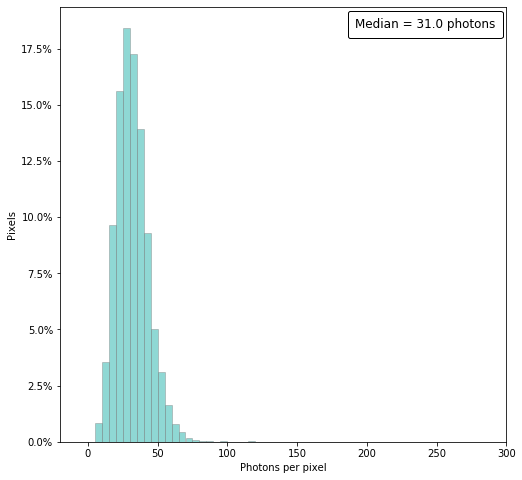

In [58]:
image = datareader.DaxReader(file_name).loadAFrame(frame_no).astype(numpy.float64)
movie_name = file_name.rsplit('.dax',1)[0][:]
print(movie_name)
ph_img = (image-500)*0.102
showImageHist(ph_img, imgnm = movie_name+'_frame_'+str(frame_no)+'_hist')


In [59]:
# print(numpy.arange(3,100,8))